### Repaso de prueba 2 
#### Inteligencia Artificial

In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import os
import json

# 1. Cargando un dataset en Pandas con un formato poco tipico

En el siguiente problema se le otorga la responsabilidad de cargar un dataset entregado por el equipo de desarrollo backend.
Usted debe hacer los siguientes analisis

a. Cargar el dataset en un formato conocido para usted (Pandas DataFrame) SIN DESPERDICIAR NINGUNA ARCHIVO JSON.

b. En contrar los estadisiticos siguientes para cada columna:

        . media
        . mediana
        . maximo
        . minimo
        . moda
        
c. Haga un UNICO grafico, en donde se muestre un histograma para todas las columnas numericas que existan en el dataset. En el grafico debe salir la leyenda (explicado en la calse online de Graficos)

In [17]:
#Leeyendo un json
import json
with open('data_de _repasoJson/1.json') as f:
    d = json.load(f)
    f.close()
print(d)

datosdir = 'data_de _repasoJson'

{'mean radius': 20.57, 'mean texture': 17.77, 'mean perimeter': 132.9, 'mean area': 1326.0, 'mean smoothness': 0.08474, 'mean compactness': 0.07864, 'mean concavity': 0.0869, 'mean concave points': 0.07017, 'mean symmetry': 0.1812, 'mean fractal dimension': 0.05667, 'radius error': 0.5435, 'texture error': 0.7339, 'perimeter error': 3.398, 'area error': 74.08, 'smoothness error': 0.005225, 'compactness error': 0.01308, 'concavity error': 0.0186, 'concave points error': 0.0134, 'symmetry error': 0.01389, 'fractal dimension error': 0.003532, 'worst radius': 24.99, 'worst texture': 23.41, 'worst perimeter': 158.8, 'worst area': 1956.0, 'worst smoothness': 0.1238, 'worst compactness': 0.1866, 'worst concavity': 0.2416, 'worst concave points': 0.186, 'worst symmetry': 0.275, 'worst fractal dimension': 0.08902}


In [18]:
listaArchivos = os.listdir(datosdir)
listaArchivos[:10] #Lista de los 10 primeros 

['379.json',
 '396.json',
 '115.json',
 '545.json',
 '400.json',
 '284.json',
 '512.json',
 '142.json',
 '457.json',
 '292.json']

In [21]:
from itertools import chain
from collections import defaultdict

data = defaultdict(list) # esto es para escribir menos codigo, pero se puede con el dictionary normal

columnas = set()

for file in os.listdir(datosdir):
    if not file.endswith('json'):
        #caso que un archivo no sea json y no leerlo
        continue
    file_path = os.path.join(datosdir, file)
    with open(file_path, 'r')as f:
        d = json.load(f)
        cols = d.keys()
        f.close()
        columnas = set(chain(columnas, cols))
    for col in columnas:
        data[col].append(d.get(col,'None'))
for cols, vals in data.items():
    print('Columna {}, largo {}'.format(col , len(vals)))


Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569
Columna mean area, largo 569


In [24]:
#Siguente paso convertir los datos en un dataframe de pandas

df = pd.DataFrame(data)

df.head()

,worst radius,mean fractal dimension,worst symmetry,worst fractal dimension,mean perimeter,smoothness error,worst compactness,worst concavity,mean compactness,mean concave points,...,worst concave points,perimeter error,mean texture,worst smoothness,worst texture,mean concavity,area error,fractal dimension error,concave points error,mean area
0,13.24,0.07950,0.4154,0.1403,73.3,0.007405,0.9379,0.8402,0.21540,0.06367,...,0.2524,1.719,18.83,0.2184,32.82,0.1689,13.99,0.004435,0.01339,361.6
1,14.8,0.06079,0.2666,0.07686,88.1,0.005442,0.257,0.3438,0.11470,0.05381,...,0.1453,1.513,18.89,0.1428,27.2,0.0858,19.29,0.002464,0.01367,558.1
2,13.67,0.06194,0.2438,0.08541,76.53,0.007803,0.2399,0.1503,0.07849,0.02008,...,0.07247,2.0,21.53,0.15,26.15,0.03328,24.79,0.003856,0.007711,438.6
3,15.35,0.05801,0.2642,0.06953,87.19,0.005868,0.1517,0.1049,0.06747,0.02443,...,0.07174,2.066,23.23,0.1216,29.09,0.02974,31.24,0.002583,0.009064,573.2
4,20.8,0.07115,0.3245,0.1198,124.4,0.007159,0.5917,0.9034,0.25760,0.1198,...,0.1964,3.123,21.02,0.1873,27.78,0.3189,41.51,0.005099,0.01051,994.0


In [25]:
df.tail()

,worst radius,mean fractal dimension,worst symmetry,worst fractal dimension,mean perimeter,smoothness error,worst compactness,worst concavity,mean compactness,mean concave points,...,worst concave points,perimeter error,mean texture,worst smoothness,worst texture,mean concavity,area error,fractal dimension error,concave points error,mean area
564,21.65,0.06000,0.292,0.07614,129.1,0.010610,0.2968,0.3458,0.15580,0.08886,...,0.1564,4.037,23.5,0.1463,30.53,0.2049,60.41,0.003949,0.01559,1155.0
565,14.06,0.06046,0.3035,0.07661,80.45,0.003796,0.2506,0.2028,0.07630,0.02369,...,0.1053,1.253,17.31,0.1276,24.34,0.03609,11.91,0.001541,0.007096,480.1
566,20.01,0.05656,0.4863,0.08633,110.1,0.005776,0.3835,0.5409,0.13360,0.06018,...,0.1813,3.008,21.59,0.1563,29.02,0.1348,45.19,0.002665,0.01195,869.5
567,20.11,0.05549,0.3437,0.08631,101.2,0.004626,0.3547,0.2902,0.08799,0.05189,...,0.1541,2.406,20.31,0.1414,32.82,0.06593,40.98,0.00243,0.009767,766.6
568,12.4,0.06574,0.2941,0.0918,73.99,0.004957,0.201,0.2596,0.08228,0.01969,...,0.07431,1.567,14.59,0.1352,21.9,0.05308,14.34,0.003614,0.008038,404.9


In [26]:
df.describe()

,mean fractal dimension,smoothness error,worst concavity,mean compactness,mean radius,compactness error,texture error,symmetry error,radius error
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.062798,0.007041,0.272188,0.104341,14.127292,0.025478,1.216853,0.020542,0.405172
std,0.007060,0.003003,0.208624,0.052813,3.524049,0.017908,0.551648,0.008266,0.277313
min,0.049960,0.001713,0.000000,0.019380,6.981000,0.002252,0.360200,0.007882,0.111500
25%,0.057700,0.005169,0.114500,0.064920,11.700000,0.013080,0.833900,0.015160,0.232400
50%,0.061540,0.006380,0.226700,0.092630,13.370000,0.020450,1.108000,0.018730,0.324200
75%,0.066120,0.008146,0.382900,0.130400,15.780000,0.032450,1.474000,0.023480,0.478900
max,0.097440,0.031130,1.252000,0.345400,28.110000,0.135400,4.885000,0.078950,2.873000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   worst radius             569 non-null    object 
 1   mean fractal dimension   569 non-null    float64
 2   worst symmetry           569 non-null    object 
 3   worst fractal dimension  569 non-null    object 
 4   mean perimeter           569 non-null    object 
 5   smoothness error         569 non-null    float64
 6   worst compactness        569 non-null    object 
 7   worst concavity          569 non-null    float64
 8   mean compactness         569 non-null    float64
 9   mean concave points      569 non-null    object 
 10  mean radius              569 non-null    float64
 11  compactness error        569 non-null    float64
 12  texture error            569 non-null    float64
 13  symmetry error           569 non-null    float64
 14  radius error             5

In [29]:
df = df.replace(['None'], None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   worst radius             566 non-null    object 
 1   mean fractal dimension   569 non-null    float64
 2   worst symmetry           566 non-null    object 
 3   worst fractal dimension  568 non-null    object 
 4   mean perimeter           567 non-null    object 
 5   smoothness error         569 non-null    float64
 6   worst compactness        568 non-null    object 
 7   worst concavity          569 non-null    float64
 8   mean compactness         569 non-null    float64
 9   mean concave points      568 non-null    object 
 10  mean radius              569 non-null    float64
 11  compactness error        569 non-null    float64
 12  texture error            569 non-null    float64
 13  symmetry error           569 non-null    float64
 14  radius error             5

In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   worst radius             535 non-null    object 
 1   mean fractal dimension   535 non-null    float64
 2   worst symmetry           535 non-null    object 
 3   worst fractal dimension  535 non-null    object 
 4   mean perimeter           535 non-null    object 
 5   smoothness error         535 non-null    float64
 6   worst compactness        535 non-null    object 
 7   worst concavity          535 non-null    float64
 8   mean compactness         535 non-null    float64
 9   mean concave points      535 non-null    object 
 10  mean radius              535 non-null    float64
 11  compactness error        535 non-null    float64
 12  texture error            535 non-null    float64
 13  symmetry error           535 non-null    float64
 14  radius error             5

In [32]:
df.mean()

worst radius                16.320241
mean fractal dimension       0.062871
worst symmetry               0.290516
worst fractal dimension      0.084206
mean perimeter              92.187439
smoothness error             0.007045
worst compactness            0.256655
worst concavity              0.274839
mean compactness             0.104857
mean concave points          0.049228
mean radius                 14.157262
compactness error            0.025767
texture error                1.228797
symmetry error               0.020622
radius error                 0.407921
worst area                 887.640935
mean symmetry                0.181132
concavity error              0.032204
mean smoothness              0.096251
worst perimeter            107.649869
worst concave points         0.115359
perimeter error              2.889326
mean texture                19.346991
worst smoothness             0.132354
worst texture               25.806131
mean concavity               0.089691
area error  

In [33]:
df.median()

worst radius                15.010000
mean fractal dimension       0.061490
worst symmetry               0.282600
worst fractal dimension      0.080090
mean perimeter              86.600000
smoothness error             0.006399
worst compactness            0.211900
worst concavity              0.229800
mean compactness             0.092630
mean concave points          0.033410
mean radius                 13.400000
compactness error            0.020620
texture error                1.140000
symmetry error               0.018750
radius error                 0.324900
worst area                 694.400000
mean symmetry                0.179300
concavity error              0.026110
mean smoothness              0.095780
worst perimeter             97.900000
worst concave points         0.099930
perimeter error              2.287000
mean texture                18.900000
worst smoothness             0.131300
worst texture               25.480000
mean concavity               0.060150
area error  

In [34]:
df.max()

worst radius                 36.04
mean fractal dimension     0.09744
worst symmetry              0.6638
worst fractal dimension     0.2075
mean perimeter               188.5
smoothness error           0.03113
worst compactness            1.058
worst concavity              1.252
mean compactness            0.3454
mean concave points         0.2012
mean radius                  28.11
compactness error           0.1354
texture error                4.885
symmetry error             0.07895
radius error                 2.873
worst area                  4254.0
mean symmetry                0.304
concavity error              0.396
mean smoothness             0.1634
worst perimeter              251.2
worst concave points         0.291
perimeter error              21.98
mean texture                 39.28
worst smoothness            0.2226
worst texture                49.54
mean concavity              0.4268
area error                   542.2
fractal dimension error    0.02984
concave points error

In [35]:
df.min()

worst radius                   7.93
mean fractal dimension      0.04996
worst symmetry               0.1565
worst fractal dimension     0.05504
mean perimeter                43.79
smoothness error           0.001713
worst compactness           0.02729
worst concavity                 0.0
mean compactness            0.01938
mean concave points             0.0
mean radius                   6.981
compactness error          0.002252
texture error                0.3602
symmetry error             0.007882
radius error                 0.1115
worst area                    185.2
mean symmetry                 0.106
concavity error                 0.0
mean smoothness             0.05263
worst perimeter               50.41
worst concave points            0.0
perimeter error               0.757
mean texture                   9.71
worst smoothness            0.07117
worst texture                 12.02
mean concavity                  0.0
area error                    6.802
fractal dimension error    0

In [36]:
df.mode()

,worst radius,mean fractal dimension,worst symmetry,worst fractal dimension,mean perimeter,smoothness error,worst compactness,worst concavity,mean compactness,mean concave points,...,worst concave points,perimeter error,mean texture,worst smoothness,worst texture,mean concavity,area error,fractal dimension error,concave points error,mean area
0,12.36,0.05667,0.2226,0.06386,87.76,0.005080,0.3416,0.0,0.1206,0.0,...,0.0,1.778,15.7,0.1216,17.7,0.0,16.97,0.001784,0.0,321.6
1,13.34,0.05907,0.2369,0.06783,134.7,0.005251,NaN,NaN,NaN,NaN,...,NaN,NaN,16.85,0.1223,27.26,NaN,18.54,0.001892,NaN,334.2
2,13.5,0.05913,0.2972,0.06915,NaN,0.005298,NaN,NaN,NaN,NaN,...,NaN,NaN,17.46,0.1234,NaN,NaN,NaN,0.001956,NaN,361.6
3,NaN,0.06113,0.3109,0.07083,NaN,0.005518,NaN,NaN,NaN,NaN,...,NaN,NaN,18.9,0.1256,NaN,NaN,NaN,0.001971,NaN,372.7
4,NaN,0.06782,0.3196,0.07127,NaN,0.005910,NaN,NaN,NaN,NaN,...,NaN,NaN,19.83,0.1275,NaN,NaN,NaN,0.001976,NaN,394.1
5,NaN,NaN,NaN,0.07427,NaN,0.005969,NaN,NaN,NaN,NaN,...,NaN,NaN,20.52,0.1347,NaN,NaN,NaN,0.002205,NaN,399.8
6,NaN,NaN,NaN,0.07623,NaN,0.006040,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002256,NaN,420.3
7,NaN,NaN,NaN,0.07722,NaN,0.006064,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002551,NaN,432.0
8,NaN,NaN,NaN,0.07738,NaN,0.006399,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002665,NaN,466.1
9,NaN,NaN,NaN,0.07863,NaN,0.007189,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002701,NaN,477.3


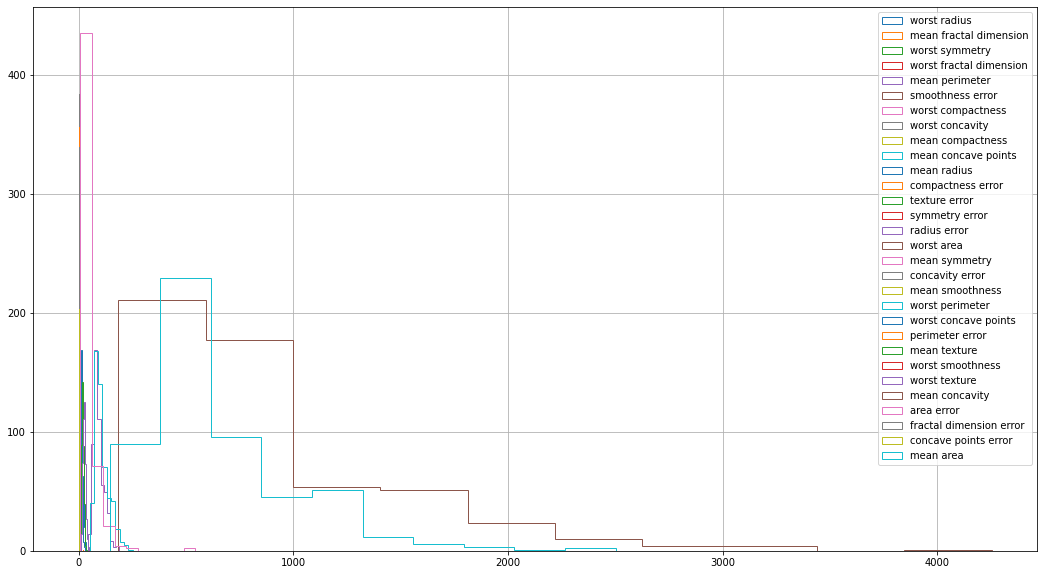

In [37]:

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(18, 10))
ax = figure.add_subplot()
for col in columnas:
    ax.hist(df[col], label=col, histtype='step')
plt.legend()
plt.grid()
plt.show()